# CIFAR10 small image classification

Dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

## References

- [Convolutional Neural Networks (CNN) for CIFAR-10 Dataset](http://parneetk.github.io/blog/cnn-cifar10/)

- [Achieving 90% accuracy in Object Recognition Task on CIFAR-10 Dataset with Keras: CNNs](https://appliedmachinelearning.blog/2018/03/24/achieving-90-accuracy-in-object-recognition-task-on-cifar-10-dataset-with-keras-convolutional-neural-networks/)

- [Object Classification with CNNs using Keras](https://machinelearningmastery.com/object-recognition-convolutional-neural-networks-keras-deep-learning-library/)

- [CIFAR-10 Image Classification in TensorFlow](https://towardsdatascience.com/cifar-10-image-classification-in-tensorflow-5b501f7dc77c)

## Show Examples from each class

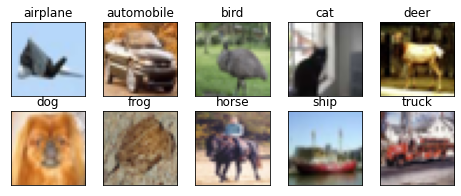

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import cifar10

def show_images(num_classes):
    """
    Show samples from each class
    """
    fig = plt.figure(figsize=(8,3))

    for i in range(num_classes):
        ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
        idx = np.where(y_train[:]==i)[0]
        x_idx = X_train[idx,::]
        img_num = np.random.randint(x_idx.shape[0])
        im = np.transpose(x_idx[img_num,::], (1, 2, 0))
        ax.set_title(class_names[i])
        plt.imshow(im)

    plt.show()

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  X_train.shape
num_test, _, _, _ =  X_train.shape
num_classes = len(np.unique(y_train))

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

show_images(num_classes)


## Data pre-processing

In [23]:
import keras
import numpy as np
from keras.datasets import cifar10
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

num_classes = 10

# CIFAR10 dataset
# CIFAR10 small images classification dataset
# This is a dataset of 50,000 32x32 color training images and 10,000 test images,
# labeled over 10 categories.

# Create train/test/validation split
# We want to split our dataset into separate training and test datasets
# We use the training dataset to fit the model and the test dataset to evaluate
# its performance to generalize to unseen data.
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.5)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_valid = X_valid.astype('float32')

# Standardize the columns (Z-score)
# We need to standardize the columns before we feed them to a linear classifier
mean = np.mean(X_train, axis=(0,1,2,3))
std = np.std(X_train, axis=(0,1,2,3))
X_train_std = (X_train - mean)/(std + 1e-7)
X_test_std = (X_test - mean)/(std + 1e-7)
X_valid_std = (X_valid - mean)/(std + 1e-7)

# Same thing
# Sometimes we need to standardize the columns before we feed them to a linear classifier,
# but if the X values are in the range 0-255 then transformed to 0-1, we can skip this step.
# stdscaler = preprocessing.StandardScaler().fit(X_train)
# X_train_scaled = stdscaler.transform(X_train)
# X_test_scaled  = stdscaler.transform(X_test)

# One-hot encoding
# Represent each integer value as a binary vector that is all zeros
# except the index of the integer.
y_train_hot = np_utils.to_categorical(y_train, num_classes)
y_test_hot = np_utils.to_categorical(y_test, num_classes)
y_valid_hot = np_utils.to_categorical(y_valid, num_classes)

print(X_train.shape[0], 'Train samples')
print(X_valid.shape[0], 'Validation samples')
print(X_test.shape[0], 'Test samples')

print('\nX_train shape:', X_train.shape)
print('X_valid shape:', X_valid.shape)
print('X_test shape:', X_test.shape)

print('y_train shape:', y_train.shape)
print('y_valid shape:', y_valid.shape)
print('y_test shape:', y_test.shape)

print('y_train_hot shape:', y_train_hot.shape)
print('y_valid_hot shape:', y_valid_hot.shape)
print('y_test_hot shape:', y_test_hot.shape)

# print('\nX_train:\n', X_train[:1,:,:,:])

# Save datasets to file
np.savez('cifar10.npz', X_train=X_train, X_valid=X_valid, X_test=X_test,
         y_train=y_train, y_valid=y_valid, y_test=y_test,
         y_train_hot=y_train_hot, y_valid_hot=y_valid_hot, y_test_hot=y_test_hot)


25000 Train samples
25000 Validation samples
10000 Test samples

X_train shape: (25000, 3, 32, 32)
X_valid shape: (25000, 3, 32, 32)
X_test shape: (10000, 3, 32, 32)
y_train shape: (25000, 1)
y_valid shape: (25000, 1)
y_test shape: (10000, 1)
y_train_hot shape: (25000, 10)
y_valid_hot shape: (25000, 10)
y_test_hot shape: (10000, 10)


## Load Dataset from File

In [24]:
import numpy as np
from pprint import pprint

# Load datasets from file
npzfile = np.load('cifar10.npz')
pprint(npzfile.files, compact=True)

X_train = npzfile['X_train']
X_valid = npzfile['X_valid']
X_test = npzfile['X_test']

y_train = npzfile['y_train']
y_valid = npzfile['y_valid']
y_test = npzfile['y_test']

y_train_hot = npzfile['y_train_hot']
y_valid_hot = npzfile['y_valid_hot']
y_test_hot = npzfile['y_test_hot']

print()
print(X_train.shape[0], 'Train samples')
print(X_valid.shape[0], 'Validation samples')
print(X_test.shape[0], 'Test samples')

print('\n', type(X_train))
print('X_train shape:', X_train.shape)
print('X_valid shape:', X_valid.shape)
print('X_test shape:', X_test.shape)

print('\ny_train shape:', y_train.shape)
print('y_valid shape:', y_valid.shape)
print('y_test shape:', y_test.shape)

print('\ny_train_hot shape:', y_train_hot.shape)
print('y_valid_hot shape:', y_valid_hot.shape)
print('y_test_hot shape:', y_test_hot.shape)

# print('X_train:', X_train[1,:,:,:])

['X_train', 'X_valid', 'X_test', 'y_train', 'y_valid', 'y_test', 'y_train_hot',
 'y_valid_hot', 'y_test_hot']

25000 Train samples
25000 Validation samples
10000 Test samples

 <class 'numpy.ndarray'>
X_train shape: (25000, 3, 32, 32)
X_valid shape: (25000, 3, 32, 32)
X_test shape: (10000, 3, 32, 32)

y_train shape: (25000, 1)
y_valid shape: (25000, 1)
y_test shape: (10000, 1)

y_train_hot shape: (25000, 10)
y_valid_hot shape: (25000, 10)
y_test_hot shape: (10000, 10)


## Data Sanity Check

In [27]:
import numpy as np

# Load datasets from file
npzfile = np.load('cifar10.npz')
pprint(npzfile.files, compact=True)

X_train = npzfile['X_train']
X_valid = npzfile['X_valid']
X_test = npzfile['X_test']

y_train = npzfile['y_train']
y_valid = npzfile['y_valid']
y_test = npzfile['y_test']

y_train_hot = npzfile['y_train_hot']
y_valid_hot = npzfile['y_valid_hot']
y_test_hot = npzfile['y_test_hot']

# Check that dataset has been randomized
print(y_train[0:20])

['X_train', 'X_valid', 'X_test', 'y_train', 'y_valid', 'y_test', 'y_train_hot',
 'y_valid_hot', 'y_test_hot']
[[3]
 [5]
 [5]
 [8]
 [4]
 [9]
 [7]
 [6]
 [6]
 [6]
 [7]
 [0]
 [5]
 [1]
 [0]
 [5]
 [6]
 [2]
 [9]
 [4]]


## Flatten Arrays

In [26]:
# # Standardize the Columns
# X_train = X_train / 255
# X_test = X_test / 255
#
# # Flatten X_train array
# # The model cannot deal with 3D array so we have to convert to 1D array.
# # We are flattening the 32 x 32 x 3 matrix to a flattened 1D array (32 x 32 x 3 = 3072 weights).
# X_train_flat = np.empty(shape=[X_train.shape[0]] + [3072], dtype='float32')
# for i in range(X_train.shape[0]):
#     X_train_flat[i,:] = X_train[i,:,:].flatten()
#
# # Flatten X_test array
# X_test_flat = np.empty(shape=[X_test.shape[0]] + [3072], dtype='float32')
# for i in range(X_test.shape[0]):
#     X_test_flat[i,:] = X_test[i,:,:].flatten()
#
# print('X_train_flat shape:', X_train_flat.shape)
# print('X_test_flat shape:', X_test_flat.shape)
# print('y_train_hot shape:', y_train_hot.shape)
# print('y_test_hot shape:', y_test_hot.shape)
